In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import scipy.io
from scipy.fftpack import fft
from scipy import signal
from scipy.signal import hilbert
from matplotlib import rcParams

In [2]:
data = np.load("acc.npy")
print(data.shape)
print(len(data[0][0]))
print(len(data[0][0][0]))

(9, 3)
75
5000


# Features

In [3]:
#                                      TESTING DERIVATIVE
print(len(data[0][0][0]))
x = np.array([1, 2, 4, 7, 0])
np.diff(x)

5000


array([ 1,  2,  3, -7])

In [4]:
import helper

data, envelope_group, instantaneous_freq = helper.preprocessing(sampling_freq=1000,directory_acc='D:\\Work\\Oxford\\Data\\ACC\\')

P01.mat
P04.mat
Done
Preprocessing worked
Preprocessing worked
Preprocessing worked


In [5]:
import feature_withoutEnvelope

feature_withoutenvelope = feature_withoutEnvelope.feature(np.array(data),cover= False,sampling_rate=1000)

In [6]:
#                                      ACCELEROMETER RECORDINGS
cover=False
power=[]
energy=[]
avgval=[]
varience=[]
first_derivate=[]
sampling_rate = 1000#1000Hz
dominantfreq=[]
freqrange=[]

features=[]
axi=[]
pa=[]

for pat in data:#per patient
    for axis in pat:#per axis
        e=0.0
        var=0.0
        for inst in axis:
            #################################
            fourier_transform = np.fft.rfft(inst)#one dimensional discrete fourier transform
            abs_fourier_transform = np.abs(fourier_transform)
            power_spectrum = np.square(abs_fourier_transform)
            if cover:
                power_spectrum[:10]=0 # 2
            frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))
            
            dominantfreq.append(frequency[np.argmax(power_spectrum)])
            fre=[]
            for tempindex,i in enumerate(np.diff(power_spectrum)):
                if abs(i) >=500:
                    fre.append(frequency[tempindex])
            if len(fre) >= 2:
                freqrange.append(abs(abs(fre[0])-abs(fre[-1])))
            else:
                freqrange.append(0)
            #################################
            first_derivate.append(sum(np.diff(inst))/len(np.diff(inst)))
            averg_val = sum(inst)/len(inst)# har 5000 ka mean le rha h
            for val in inst:
                e +=float(val)*float(val)#energy [J = J/s * 5 second]
                var +=(float(averg_val)-float(val))*(float(averg_val)-float(val))
            p=e/(2*len(inst))#power over each window [J/s]
            var/=(len(inst)-1)
            power.append(p)
            energy.append(e)
            avgval.append(averg_val)
            varience.append(var)
        features.append(power)
        features.append(energy)
        features.append(avgval)
        features.append(varience)
        features.append(first_derivate)
        features.append(dominantfreq)
        features.append(freqrange)
        axi.append(features)
        
        power=[]
        energy=[]
        avgval=[]
        varience=[]
        first_derivate=[]
        dominantfreq=[]
        freqrange=[]
        features=[]
    pa.append(axi)
    axi=[]

In [8]:
print(np.array(pa[0]).shape)#9,3,7,75

(3, 7, 75)


In [5]:
def dom_freq_with_range(power_spectrum1,frequency):
    dom_family1=frequency[np.argmax(power_spectrum1)]
    #dominantfreq.append(dom_family1)
    di=np.diff(power_spectrum1)
    di = np.pad(di, (0, 1), 'constant')# adds 0 at the end
    fre=[]
    for tempindex,i in enumerate(di):#as 2500 so every 5 point is 1
        if tempindex>(int(dom_family1)*5)-10 and tempindex<(int(dom_family1)*5)+10:#means +-2
            if abs(i) >=max(power_spectrum1) - max(power_spectrum1)*.70:
                fre.append(frequency[tempindex])
    if len(fre) >= 2:
        freq = (abs(abs(fre[0])-abs(fre[-1])))
    else:
        freq= 0.0
        print("Shaisse")
        
    return dom_family1, freq

In [6]:
#                                          EMG RECORDINGS

cover=False
power=[]
energy=[]
avgval=[]
varience=[]
first_derivate=[]
sampling_rate = 1000#1000Hz
dominantfreq=[]
freqrange=[]

if cover:
    dominantfreq2=[]
    freqrange2=[]
features=[]
axi=[]
pa=[]

for pat in data:#per patient
    for axis in pat:#per axis
        e=0.0
        var=0.0
        for inst in axis:
            #################################
            fourier_transform = np.fft.rfft(inst)#one dimensional discrete fourier transform
            abs_fourier_transform = np.abs(fourier_transform)

            power_spectrum1 = np.square(abs_fourier_transform)
            power_spectrum1[:10]=0 # 2 to 14
            power_spectrum1[70:]=0
            frequency = np.linspace(0, sampling_rate/2, len(power_spectrum1))
            
            dom_family1, freqrang1= dom_freq_with_range(power_spectrum1,frequency)
            dominantfreq.append(dom_family1)
            freqrange.append(float(freqrang1))
            
            #PART 2
            if cover:
                power_spectrum2 = np.square(abs_fourier_transform)
                power_spectrum2[:70]=0 # 14 to 98
                power_spectrum2[240:260]=0# 48 to 52 = 0
                power_spectrum2[490:]=0 # beyond 98 = 0
                frequency = np.linspace(0, sampling_rate/2, len(power_spectrum2))
                dom_family2, freqrang2= dom_freq_with_range(power_spectrum2,frequency)
                dominantfreq2.append(dom_family2)
                freqrange2.append(float(freqrang2))
            #################################
            first_derivate.append(sum(np.diff(inst))/len(np.diff(inst)))
            averg_val = sum(inst)/len(inst)# har 5000 ka mean le rha h
            for val in inst:
                e +=float(val)*float(val)#energy [J = J/s * 5 second]
                var +=(float(averg_val)-float(val))*(float(averg_val)-float(val))
            p=e/(2*len(inst))#power over each window [J/s]
            var/=(len(inst)-1)
            power.append(p)
            energy.append(e)
            avgval.append(averg_val)
            varience.append(var)
        features.append(power)
        features.append(energy)
        features.append(avgval)
        features.append(varience)
        features.append(first_derivate)
        features.append(dominantfreq)
        features.append(freqrange)
        if cover:
            features.append(dominantfreq2)
            features.append(freqrange2)
        axi.append(features)
        
        power=[]
        energy=[]
        avgval=[]
        varience=[]
        first_derivate=[]
        dominantfreq=[]
        freqrange=[]
        if cover:
            dominantfreq2=[]
            freqrange2=[]
        features=[]
    pa.append(axi)
    axi=[]

Shaisse
Shaisse
Shaisse
Shaisse
Shaisse
Shaisse
Shaisse
Shaisse
Shaisse
Shaisse


In [10]:
print(len(pa))#10
print(len(pa[0]))#3
print(len(pa[0][0]))#5
print(len(pa[0][0][6]))#75
print((pa[0][0][0][0]))

2
3
7
75
0.01136813088279161


In [24]:
print(len(pa))#10
print(len(pa[0]))#3
print(len(pa[0][0]))#5
print(len(pa[0][0][6]))#75
print((pa[0][0][0][0]))

2
3
7
75
0.01136813088279161


In [32]:
print(len(feature_withoutenvelope))#10
print(len(feature_withoutenvelope[0]))#3
print(len(feature_withoutenvelope[0][0]))#5
print(len(feature_withoutenvelope[0][0][6]))#75
print((feature_withoutenvelope[0][0][0][0]))

2
3
7
75
0.01136813088279161


In [11]:
np.save("temp",arr = np.array(pa))

In [14]:
a= np.load("temp.npy")
print(a.shape)

(9, 3, 7)


In [22]:
array_sum = np.sum(pa)
print()
array_has_nan = np.isnan(array_sum)

if array_has_nan.any():
    print("b;a")

# Making histograms

In [11]:
temp=pa[0]#patient
rcParams['figure.figsize'] = 50,10

In [37]:
for i in range(3):
    for j in range(7):
        print(np.sum(temp[i][j]))

2528.809571184569
25288095.711845685
84.90858055815112
8.381271953225765
0.00029309199281898066
192.6
122.60000000000002
2902.5283074143904
29025283.074143905
80.43860543442324
10.355001306186185
0.00016442700447230632
199.8
163.4
2736.868217699244
27368682.17699243
80.81595765555643
12.38573169639015
0.00028202821352120964
203.6
184.19999999999996


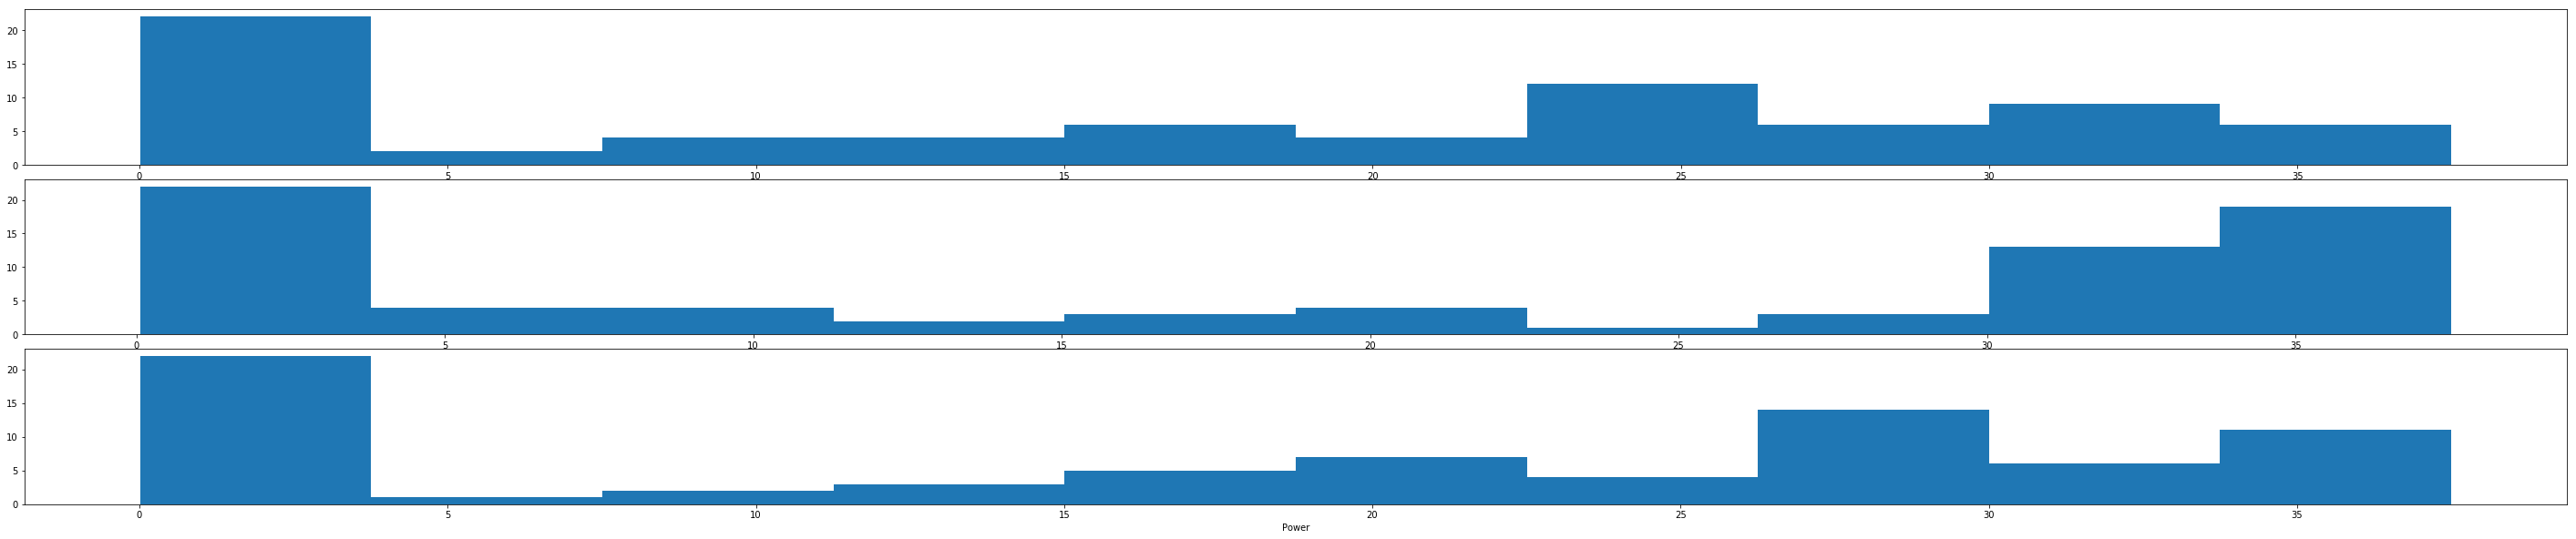

In [12]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(4,0),rowspan=2,colspan=1)

ax1.hist(temp[0][0], bins=10)#x-axis
ax2.hist(temp[1][0], bins=10)#y-axis
ax3.hist(temp[2][0], bins=10)#z-axis
plt.xlabel("Power")
plt.show()

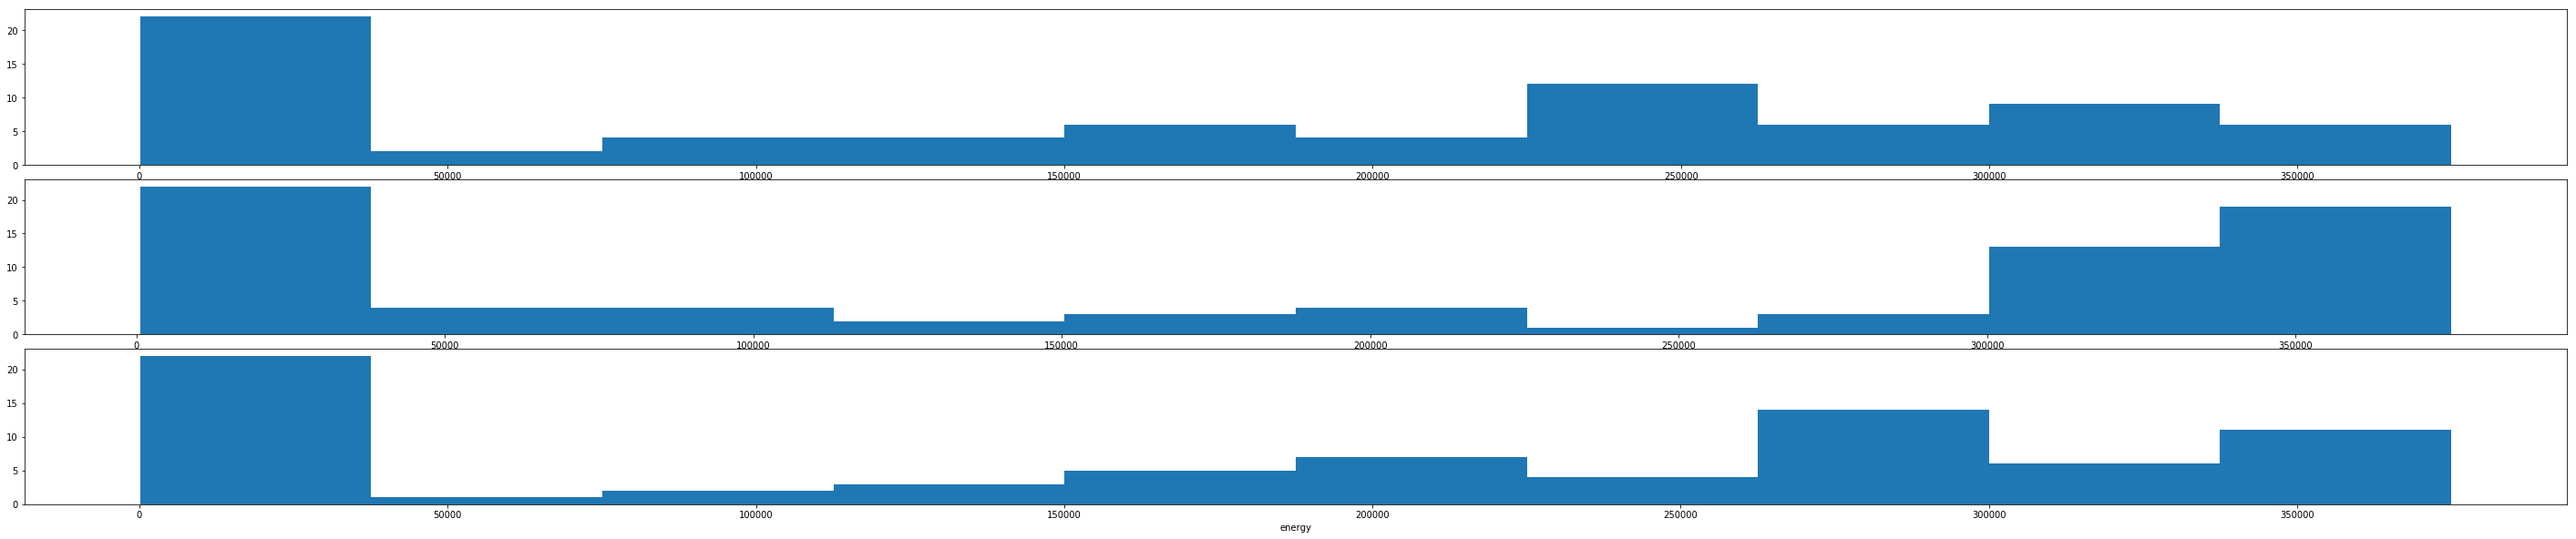

In [13]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(4,0),rowspan=2,colspan=1)

ax1.hist(temp[0][1], bins=10)#x-axis
ax2.hist(temp[1][1], bins=10)#y-axis
ax3.hist(temp[2][1], bins=10)#z-axis
plt.xlabel("energy")
plt.show()

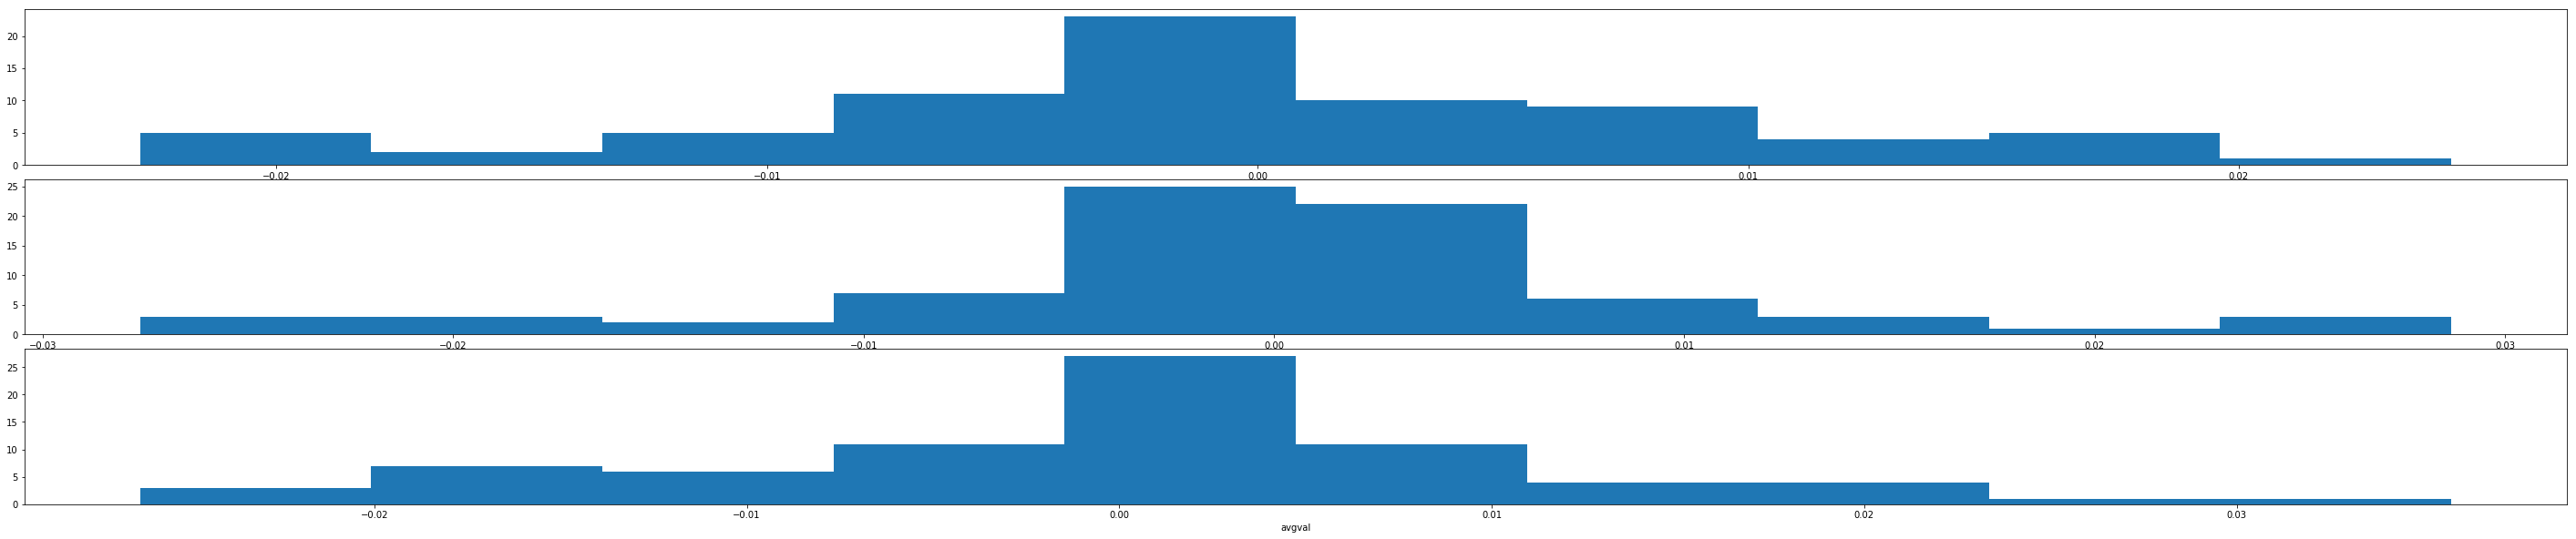

In [14]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(4,0),rowspan=2,colspan=1)

ax1.hist(temp[0][2], bins=10)#x-axis
ax2.hist(temp[1][2], bins=10)#y-axis
ax3.hist(temp[2][2], bins=10)#z-axis
plt.xlabel("avgval")
plt.show()

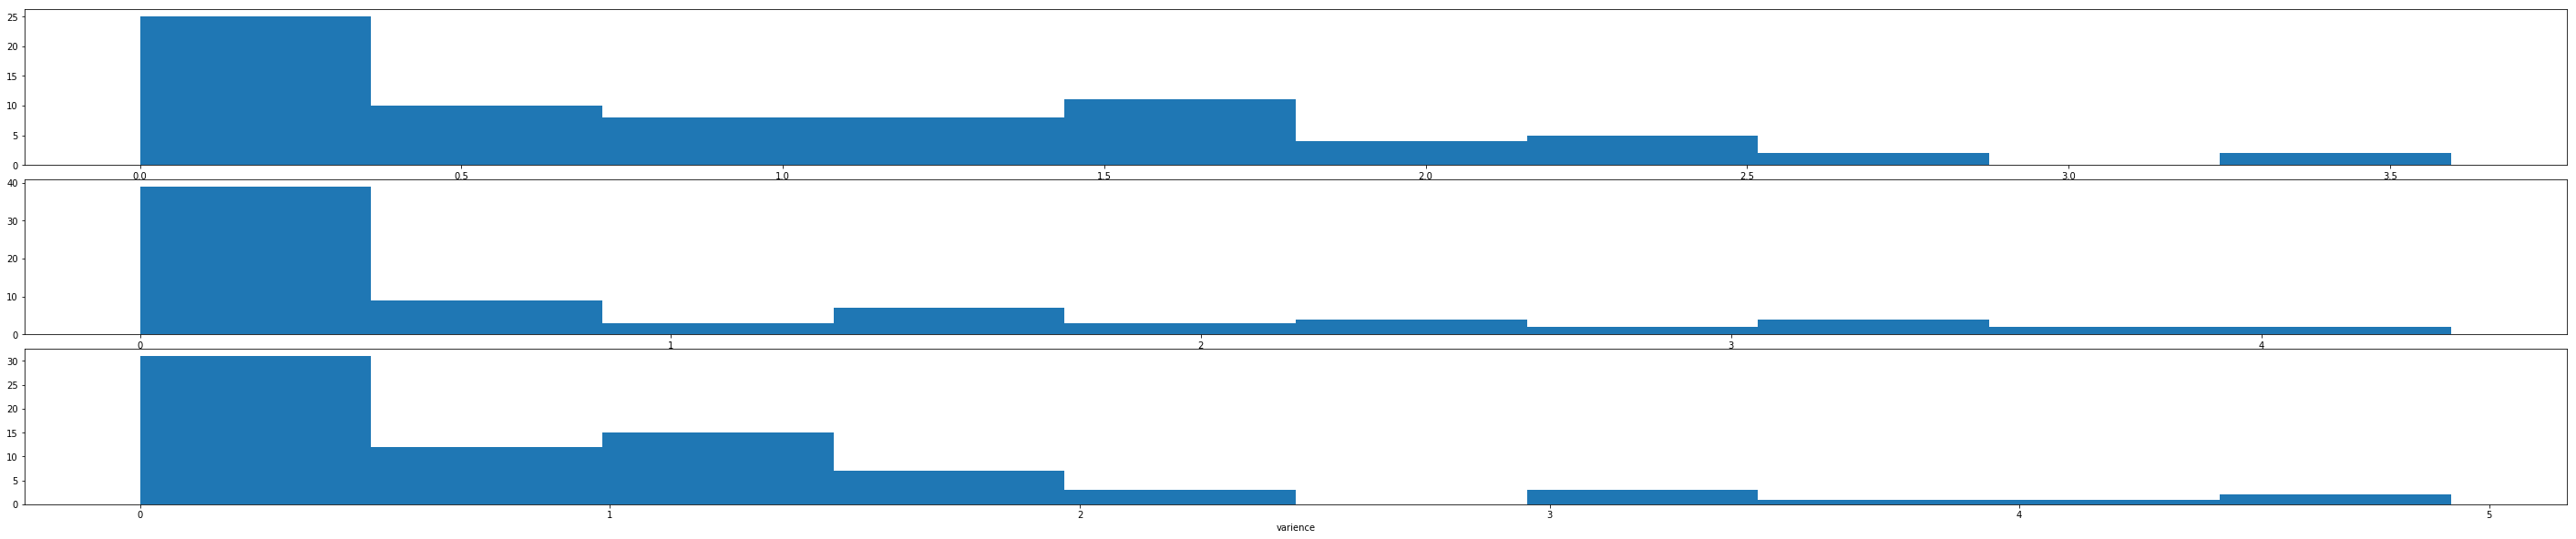

In [15]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(4,0),rowspan=2,colspan=1)

ax1.hist(temp[0][3], bins=10)#x-axis
ax2.hist(temp[1][3], bins=10)#y-axis
ax3.hist(temp[2][3], bins=10)#z-axis
plt.xlabel("varience")
plt.show()

In [14]:
print(len(temp[0][4]))

75


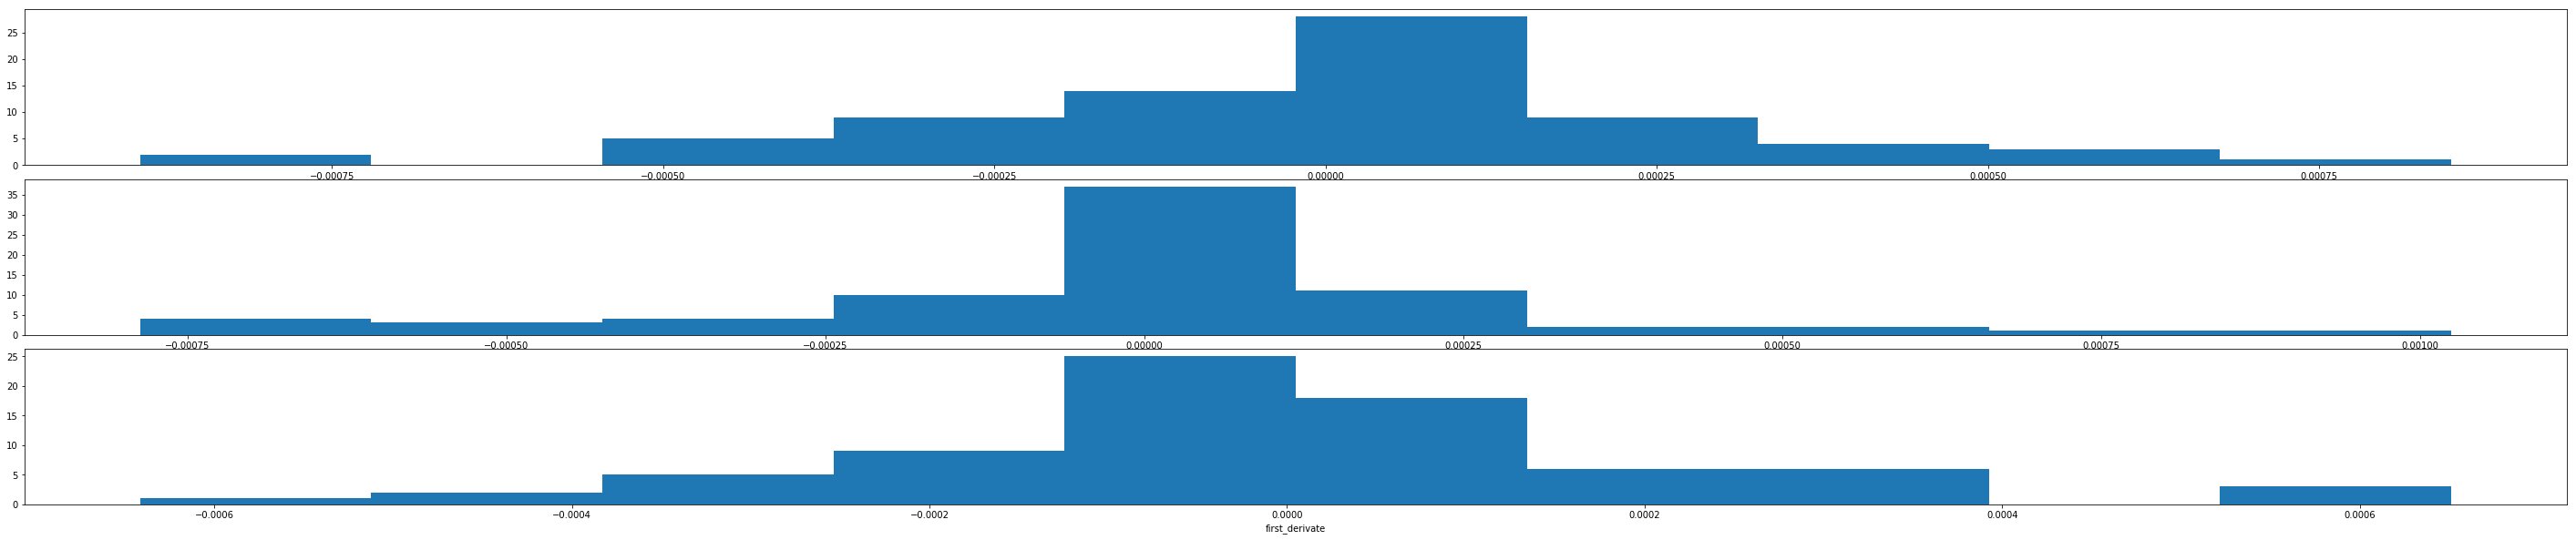

In [16]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(4,0),rowspan=2,colspan=1)

ax1.hist(temp[0][4], bins=10)#x-axis
ax2.hist(temp[1][4], bins=10)#y-axis
ax3.hist(temp[2][4], bins=10)#z-axis
plt.xlabel("first_derivate")
plt.show()

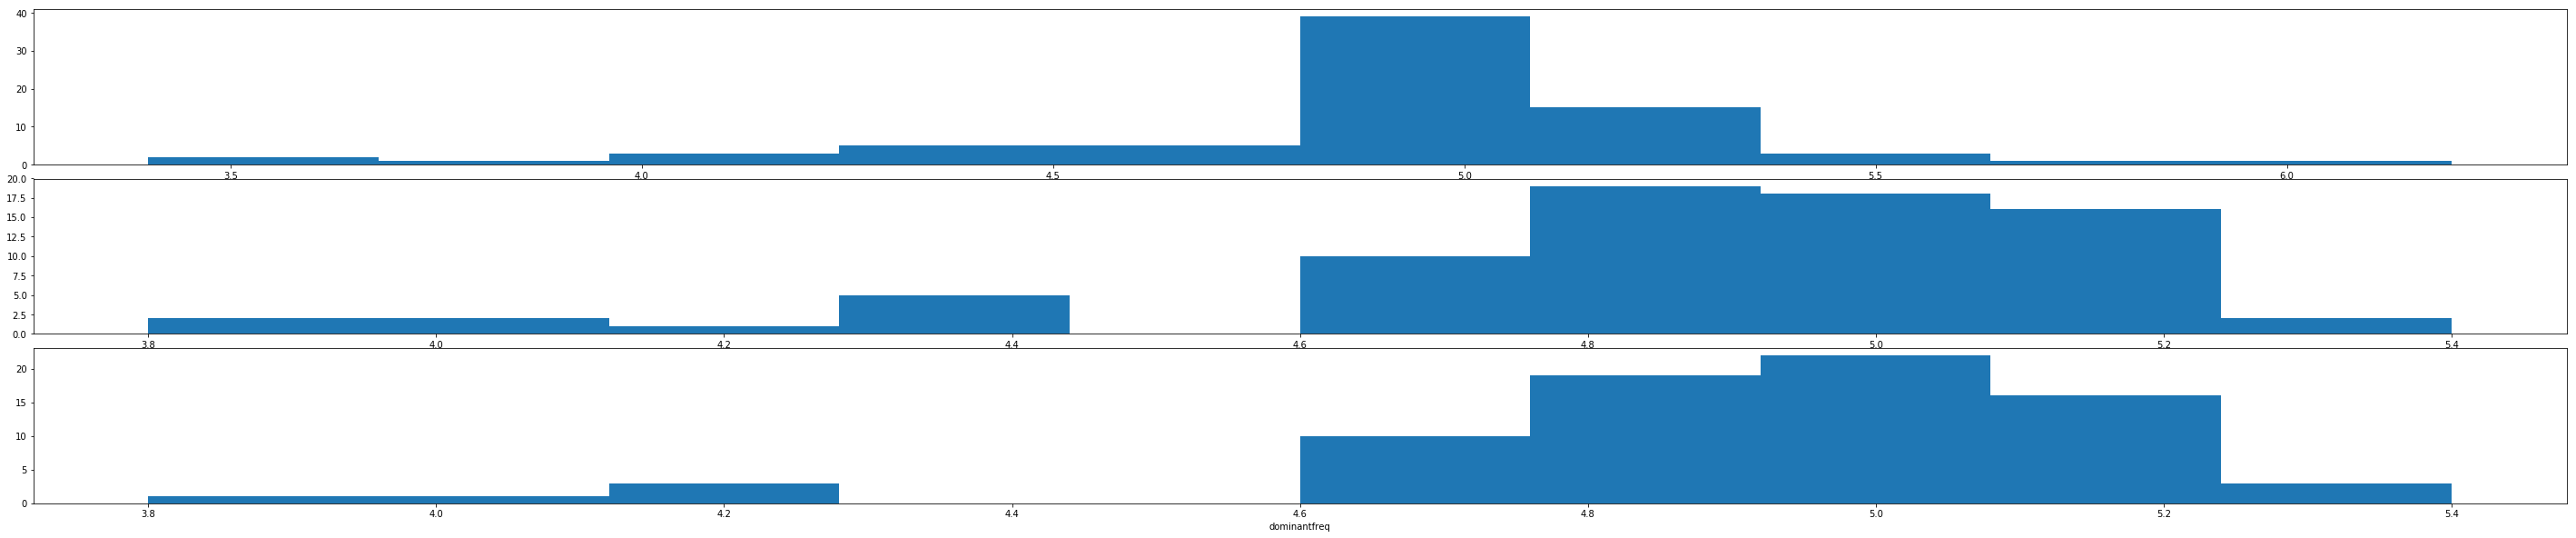

In [17]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(4,0),rowspan=2,colspan=1)

ax1.hist(temp[0][5], bins=10)#x-axis
ax2.hist(temp[1][5], bins=10)#y-axis
ax3.hist(temp[2][5], bins=10)#z-axis
plt.xlabel("dominantfreq")
plt.show()

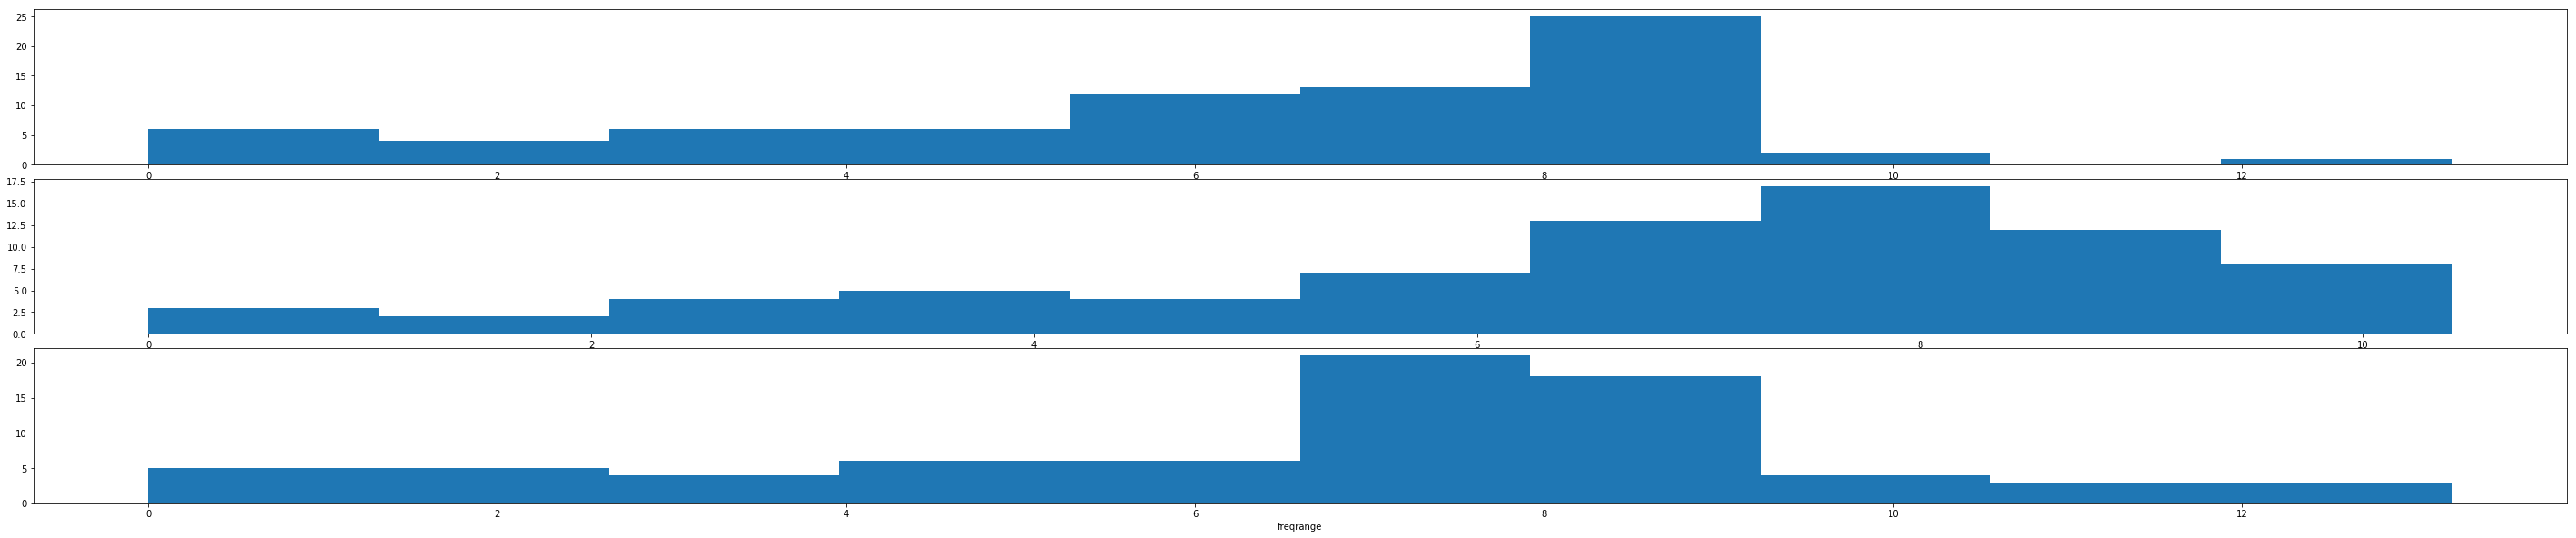

In [18]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(4,0),rowspan=2,colspan=1)

ax1.hist(temp[0][6], bins=10)#x-axis
ax2.hist(temp[1][6], bins=10)#y-axis
ax3.hist(temp[2][6], bins=10)#z-axis
plt.xlabel("freqrange")
plt.show()

IndexError: list index out of range

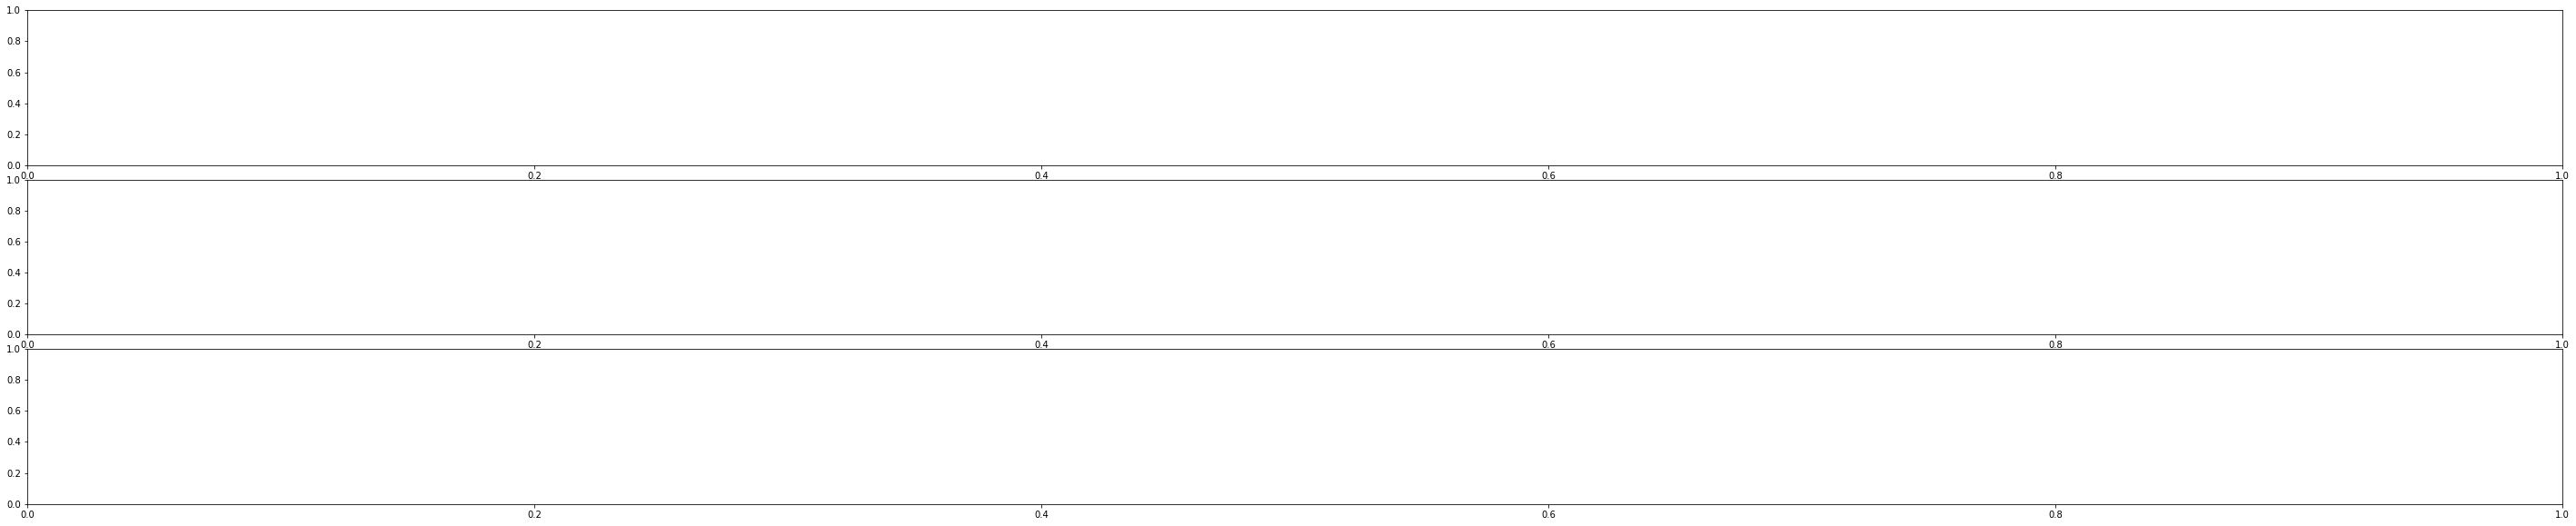

In [39]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(4,0),rowspan=2,colspan=1)

ax1.hist(temp[0][7], bins=10)#x-axis
ax2.hist(temp[1][7], bins=10)#y-axis
ax3.hist(temp[2][7], bins=10)#z-axis
plt.xlabel("dominantfreq2")
plt.show()

In [ ]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(4,0),rowspan=2,colspan=1)

ax1.hist(temp[0][8], bins=10)#x-axis
ax2.hist(temp[1][8], bins=10)#y-axis
ax3.hist(temp[2][8], bins=10)#z-axis
plt.xlabel("freqrange2")
plt.show()

# TESTING

In [7]:
print(len(pa[0][0][4]))

75


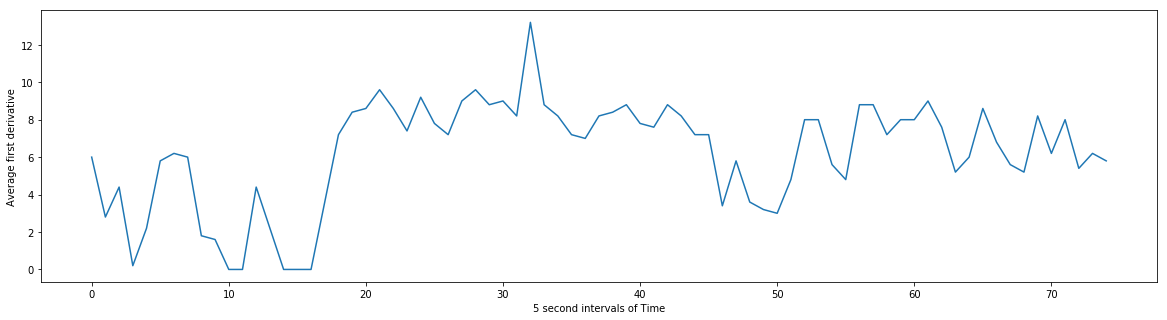

In [62]:
rcParams['figure.figsize'] = 20,5
plt.xlabel("5 second intervals of Time")
plt.ylabel("Average first derivative")
plt.plot(pa[0][0][4])
#plot histogram of features

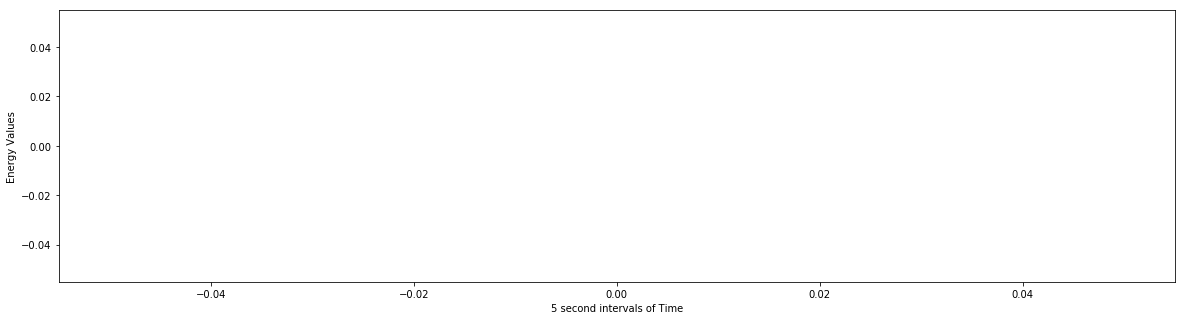

In [39]:
rcParams['figure.figsize'] = 20,5
plt.xlabel("5 second intervals of Time")
plt.ylabel("Energy Values")
plt.plot(energy)

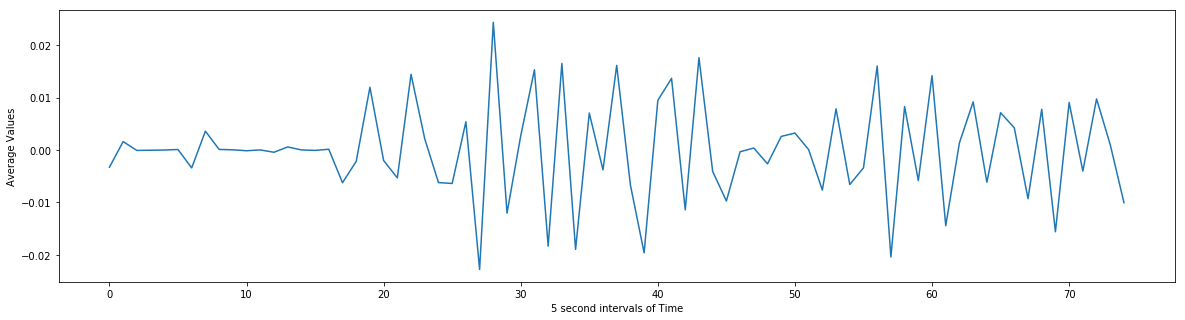

In [52]:
rcParams['figure.figsize'] = 20,5
plt.xlabel("5 second intervals of Time")
plt.ylabel("Average Values")
plt.plot(pa[0][0][2])
#plot histogram of features

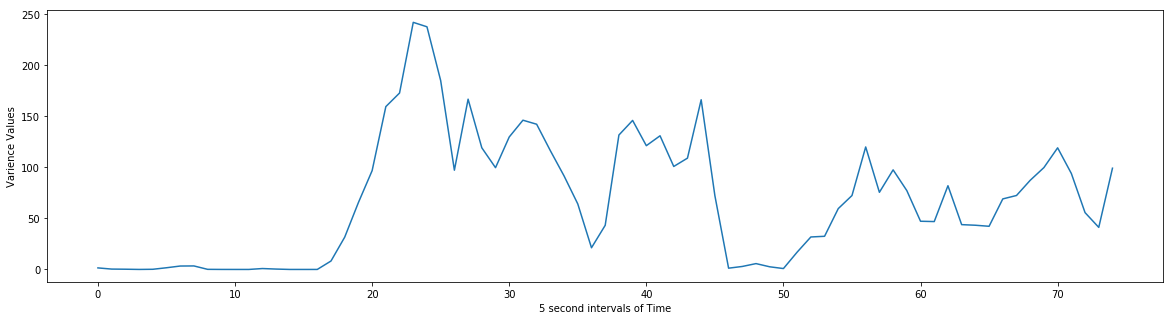

In [91]:
rcParams['figure.figsize'] = 20,5
plt.xlabel("5 second intervals of Time")
plt.ylabel("Varience Values")
plt.plot(pa[0][0][3])
#plot histogram of features

In [58]:
#print(data[0][0][44])
print(len(data[0][0][0]))
print(len(data[1][2]))

5000
61


In [47]:
for patientt in range(9):
    for ax in range(3):
        for instnat in range(len(data[patientt][ax])):
            for i in range(5000):
                if data[patientt][ax][instnat][i] < 0.5:
                    print("bla")

bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla
bla


KeyboardInterrupt: 

In [51]:
an_array = np.array([0.1,0.2,0.3,0.4,0.5])
print(an_array.shape)
norm = np.linalg.norm(an_array)
normal_array = an_array/norm
print(normal_array)
print(np.sum(normal_array))

(5,)
[0.13483997 0.26967994 0.40451992 0.53935989 0.67419986]
2.0225995873897262


7.4


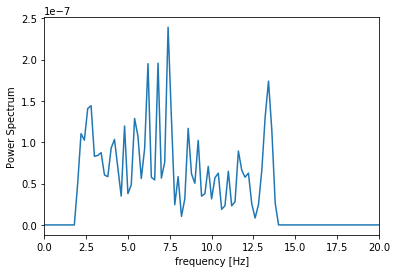

In [54]:
#TESTING FOR DOMINANT FREQ           DONE
testing_emg=data[0][2][4]
#print(testing_emg.shape)
sampling_rate = 1000#1000Hz
fourier_transform = np.fft.rfft(testing_emg)#one dimensional discrete fourier transform
abs_fourier_transform = np.abs(fourier_transform)

"""power_spectrum2 = np.square(abs_fourier_transform)
power_spectrum2[:70]=0 # 14 to 98
power_spectrum2[240:260]=0# 48 to 52 = 0
power_spectrum2[490:]=0 # beyond 98 = 0
dom_family2=frequency[np.argmax(power_spectrum2)]"""

power_spectrum1 = np.square(abs_fourier_transform)
power_spectrum1[:10]=0 # 2 to 14
power_spectrum1[70:]=0
frequency = np.linspace(0, sampling_rate/2, len(power_spectrum1))
dom_family1=frequency[np.argmax(power_spectrum1)]

di=np.diff(power_spectrum1)
di = np.pad(di, (0, 1), 'constant')# adds 0 at the end
freqrange=list()
fre=list()
for tempindex,i in enumerate(di):#as 2500 so every 5 point is 1
    if tempindex>(int(dom_family1)*5)-10 and tempindex<(int(dom_family1)*5)+10:#means +-2
        if abs(i) >=max(power_spectrum1) - max(power_spectrum1)*.53:
            fre.append(frequency[tempindex])
if len(fre) >= 2:
    freqrange.append(abs(abs(fre[0])-abs(fre[-1])))
else:
    freqrange.append(0)

plt.xlabel('frequency [Hz]')
plt.ylabel('Power Spectrum')
plt.xlim([0, 20])
#plt.ylim([1, 8])
plt.plot(frequency, power_spectrum1)
print(dom_family1)

3.2


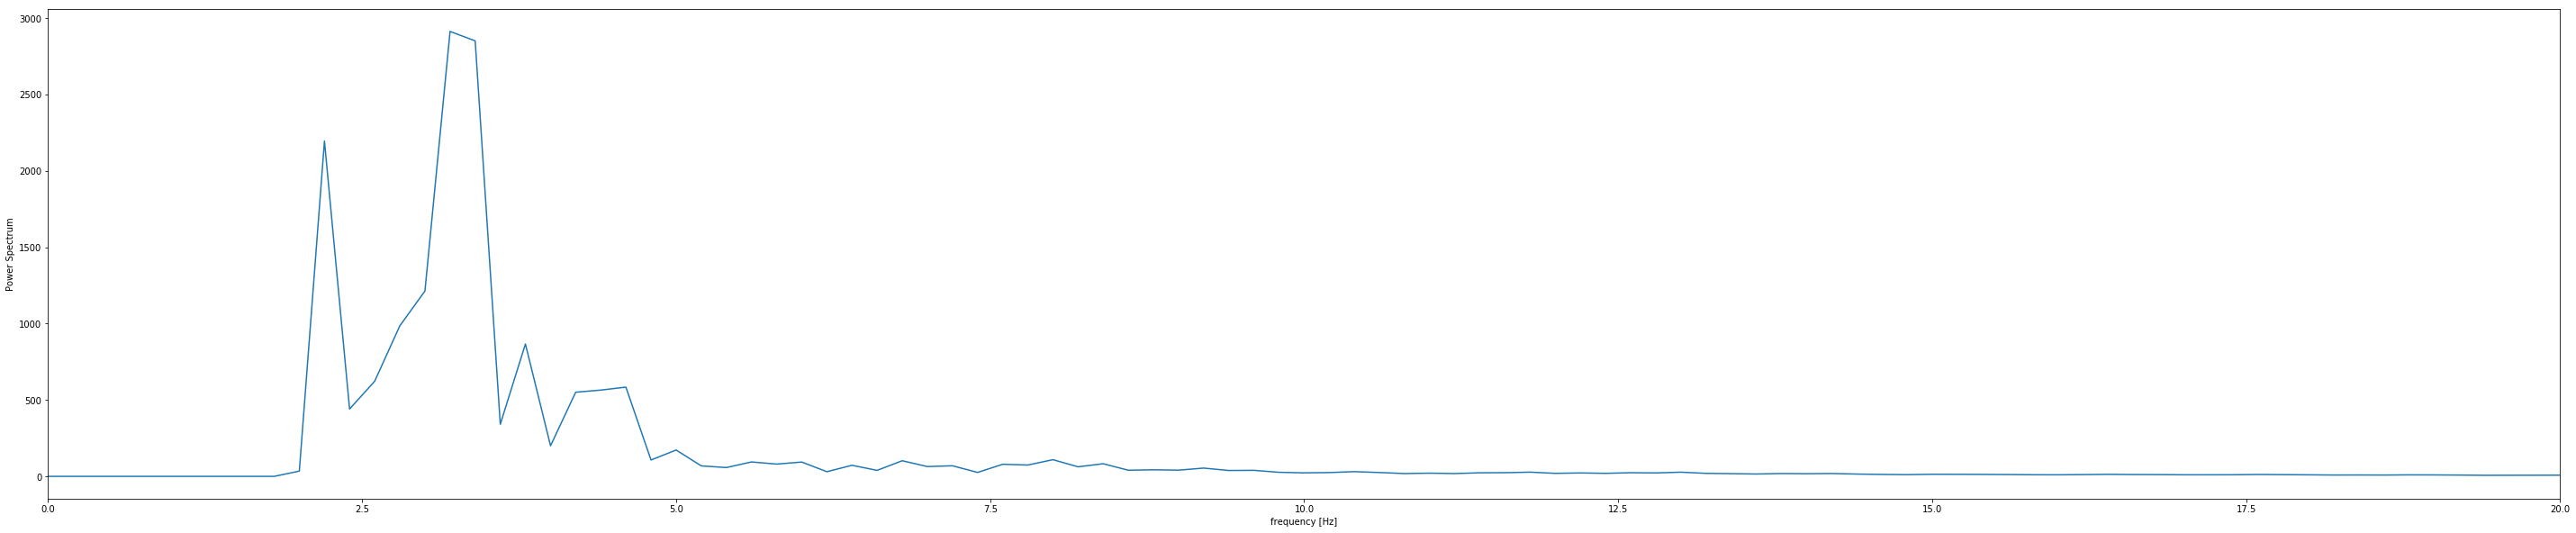

In [30]:
#TESTING FOR DOMINANT FREQ           DONE
testing_emg=data[0][2][4]
#print(testing_emg.shape)
sampling_rate = 1000#1000Hz
fourier_transform = np.fft.rfft(testing_emg)#one dimensional discrete fourier transform
abs_fourier_transform = np.abs(fourier_transform)

power_spectrum1 = np.square(abs_fourier_transform)
power_spectrum1[:10]=0 # 2 to 14
frequency = np.linspace(0, sampling_rate/2, len(power_spectrum1))
dom_family1=frequency[np.argmax(power_spectrum1)]

di=np.diff(power_spectrum1)
di = np.pad(di, (0, 1), 'constant')# adds 0 at the end
freqrange=list()
fre=list()
for tempindex,i in enumerate(di):#as 2500 so every 5 point is 1
    if tempindex>(int(dom_family1)*5)-10 and tempindex<(int(dom_family1)*5)+10:#means +-2
        if abs(i) >=max(power_spectrum1) - max(power_spectrum1)*.53:
            fre.append(frequency[tempindex])
if len(fre) >= 2:
    freqrange.append(abs(abs(fre[0])-abs(fre[-1])))
else:
    freqrange.append(0)

plt.xlabel('frequency [Hz]')
plt.ylabel('Power Spectrum')
plt.xlim([0, 20])
#plt.ylim([1, 8])
plt.plot(frequency, power_spectrum1)
print(dom_family1)

In [55]:
max(power_spectrum1)*.33

7.887007374133821e-08

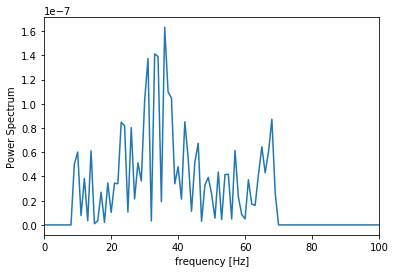

In [56]:
di=np.diff(power_spectrum1)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power Spectrum')
plt.xlim([0, 100])
#plt.ylim([1, 8])
di = np.pad(di, (0, 1), 'constant')
#plt.plot(frequency,abs(di))
plt.plot(abs(di))

In [57]:
print(fre)
print(freqrange)

[6.2, 6.6000000000000005, 6.800000000000001, 7.2]
[1.0]


In [59]:
a= np.ones((2550,))
print(a.shape)
a = np.pad(a, (0, 1), 'constant')
print(a.shape)
print(a[int(a.shape[0])-1])
print(a[int(a.shape[0])-2])

(2550,)
(2551,)
0.0
1.0


In [44]:
print(di.shape)
print(power_spectrum1.shape)

(2500,)
(2501,)


In [37]:
for i in di:
    print(abs(i))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.1670383070913933e-07
1.2585259828889652e-06
1.2585188526332917e-06
1.0907584518305447e-07
2.349584043611496e-07
1.9460682344936276e-06
1.897867527108727e-06
2.9465022538206285e-06
2.4229032998399665e-06
8.838486934290355e-06
6.634048459245662e-05
6.67427791728848e-05
5.188822691116855e-06
2.768337037034394e-06
2.0527283324259806e-07
1.0677629223951262e-06
6.089120913663858e-07
4.267602022006127e-07
7.237776819706014e-08
1.6129791169574533e-07
4.552655147618503e-08
3.4022065813433293e-07
4.525107149668487e-07
6.517930511946883e-08
1.0231721747459616e-07
2.0060862766043478e-06
1.9762724198744332e-06
4.367150674708822e-06
3.7547082702698536e-06
1.0540727367196316e-05
2.3520839403144657e-06
1.727550031215342e-06
3.835370647411667e-06
2.2385327708872593e-06
7.224091832852532e-07
2.1277939502599566e-07
3.3727590560355537e-07
1.0302876694878703e-07
1.9169877826986175e-08
3.54904504177549e-08
3.707219753480942e-07
5.022465004866853e-08
2.8578900158908706e-

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [36]:
print(di.shape)

(2500,)


In [33]:
print(fre)

[0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003, 4.0, 4.2, 4.4, 4.6000000000000005, 4.800000000000001, 5.0, 5.2, 5.4, 5.6000000000000005, 5.800000000000001, 6.0, 6.2, 6.4, 6.6000000000000005, 6.800000000000001, 7.0, 7.2, 7.4, 7.6000000000000005, 7.800000000000001, 8.0, 8.200000000000001, 8.4, 8.6, 8.8, 9.0, 9.200000000000001, 9.4, 9.600000000000001, 9.8, 10.0, 10.200000000000001, 10.4, 10.600000000000001, 10.8, 11.0, 11.200000000000001, 11.4, 11.600000000000001, 11.8, 12.0, 12.200000000000001, 12.4, 12.600000000000001, 12.8, 13.0, 13.200000000000001, 13.4, 13.600000000000001, 13.8, 14.0, 14.200000000000001, 14.4, 14.600000000000001, 14.8, 15.0, 15.200000000000001, 15.4, 15.600000000000001, 15.8, 16.0, 16.2, 16.400000000000002, 16.6, 16.8, 17.0, 17.2, 17.400000000000002, 17.6, 17.8, 18.0, 18.2, 18.400000000000002, 18.6, 18.8, 19.0, 19.2000000

In [9]:
dom_family=[]
for patientt in range(9):
    for ax in range(3):
        for instnat in range(len(data[patientt][ax])):
            sampling_rate = 1000#1000Hz
            fourier_transform = np.fft.rfft(data[patientt][ax][instnat])#one dimensional discrete fourier transform
            #print(fourier_transform.shape)

            abs_fourier_transform = np.abs(fourier_transform)

            power_spectrum = np.square(abs_fourier_transform)
            power_spectrum[:10]=0 #5 points mean 1 freq.(total are 2500 points) So we can skip first 3 frequencies 
            #power_spectrum[40:]=0
            frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))
            """plt.xlabel('frequency [Hz]')
            plt.ylabel('Power Spectrum')
            plt.xlim([-1, 25])
            plt.plot(frequency, power_spectrum)"""

            """print(np.argmax(power_spectrum))
            print(max(power_spectrum))
            print(frequency[np.argmax(power_spectrum)])"""
            dom_family.append(frequency[np.argmax(power_spectrum)])
            if frequency[np.argmax(power_spectrum)] > 100:
                print(patientt)
                print(ax)
                print(instnat)
                print("***************")
            fre=[]
            freqrange=[]
            for tempindex,i in enumerate(np.diff(power_spectrum)):
                if tempindex>40:#40/5 = 8 i.e.. max range for having a frequency range
                    break
                if abs(i)>=5:
                    fre.append(frequency[tempindex])
            if len(fre) >= 2:
                freqrange.append(abs(abs(fre[0])-abs(fre[-1])))

2
2
44
***************
2
2
45
***************
3
1
89
***************
3
1
90
***************
3
2
83
***************
6
2
54
***************
6
2
55
***************


In [10]:
(unique, counts) = np.unique(dom_family, return_counts=True)
for i,k in zip(unique, counts):
    print(float(i)," ",k)

2.0   9
2.2   3
2.4000000000000004   4
2.6   1
2.8000000000000003   4
3.0   9
3.2   23
3.4000000000000004   24
3.6   38
3.8000000000000003   71
4.0   121
4.2   32
4.4   81
4.6000000000000005   91
4.800000000000001   255
5.0   297
5.2   329
5.4   91
5.6000000000000005   16
5.800000000000001   11
6.0   25
6.2   43
6.4   14
6.6000000000000005   7
6.800000000000001   5
7.0   12
7.2   21
7.4   36
7.6000000000000005   46
7.800000000000001   14
8.0   8
8.200000000000001   3
8.4   4
8.8   5
9.0   3
9.200000000000001   5
9.4   12
9.600000000000001   11
9.8   6
10.0   11
10.200000000000001   24
10.4   33
10.600000000000001   19
10.8   7
11.0   1
11.4   2
11.600000000000001   2
12.200000000000001   1
12.4   2
12.600000000000001   1
12.8   1
37.2   1
37.6   1
38.0   2
38.2   2
38.400000000000006   1
38.800000000000004   1
39.400000000000006   1
39.6   1
40.0   1
40.2   1
40.800000000000004   1
43.800000000000004   2
48.6   1
50.0   9
52.800000000000004   1
53.400000000000006   1
56.2   1
57.2   1


Fitted mean =  -0.00039222045961743383
Fitted standard deviation =  1.0277733039793324


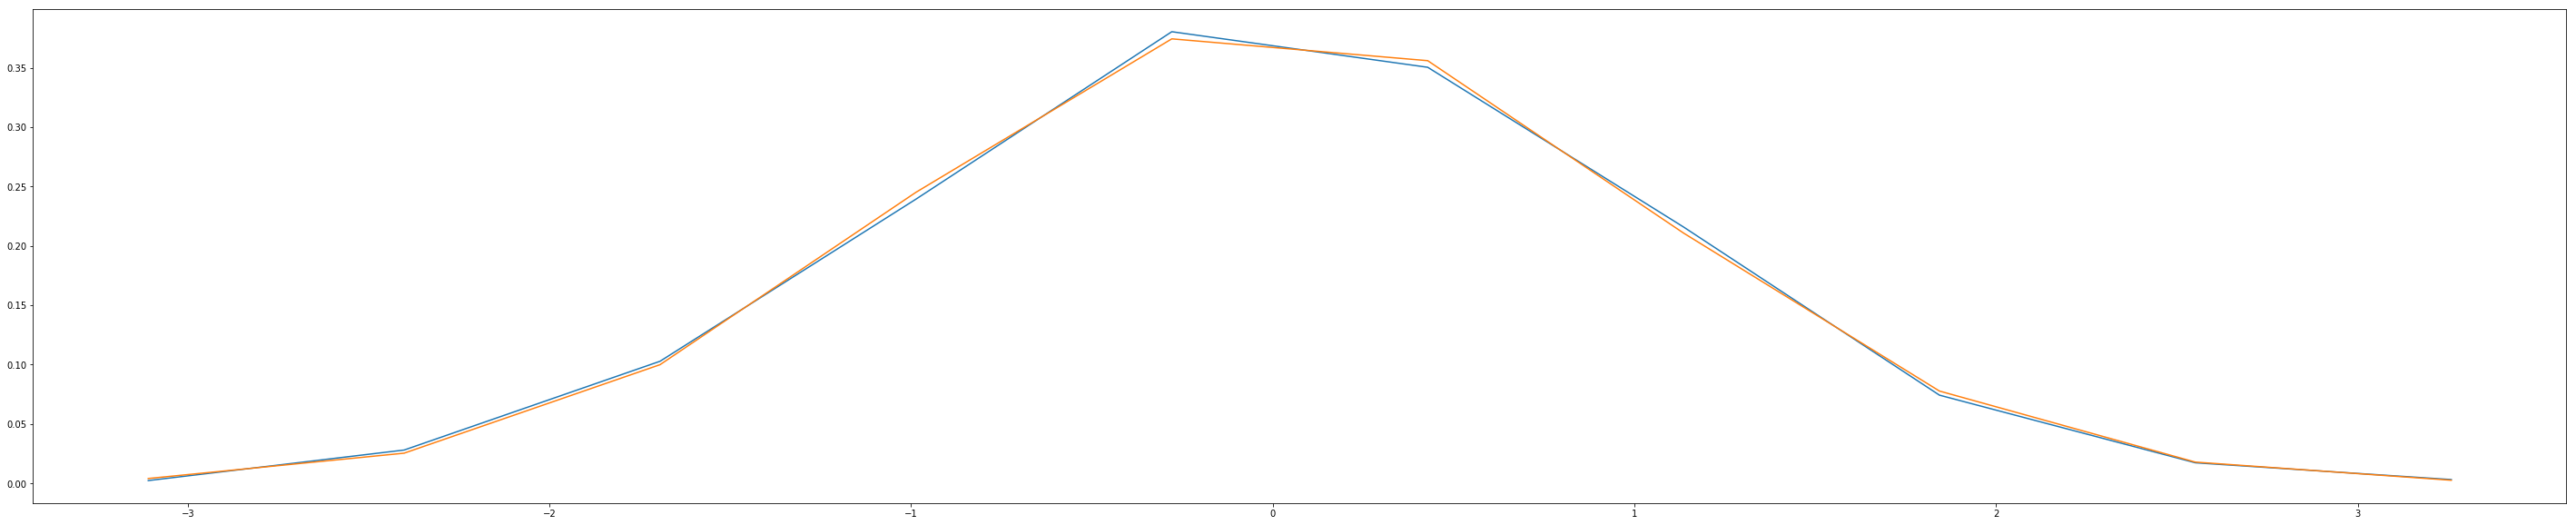

In [45]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define some test data which is close to Gaussian
data = numpy.random.normal(size=10000)

hist, bin_edges = numpy.histogram(data, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])

plt.show()

In [115]:
print(fre)
print(freqrange)
print(frequency.shape)

[3.2, 3.4000000000000004, 3.6, 3.8000000000000003, 4.0, 4.2, 4.4, 5.0, 5.2, 5.4, 5.6000000000000005, 6.6000000000000005, 7.0, 7.2]
[4.0]
(2501,)


In [64]:
print(power_spectrum.shape)

(2501,)


In [26]:
print(power_spectrum.shape)
print(np.argmax(power_spectrum[3:10]))
for i in power_spectrum[0:11]:
    print(i)

(2501,)
1
4851.9866771208235
132.27747391698617
147.35177892325254
6.637384900107759
75.20072843311974
0.05962430804304023
25.700064627987008
32.93978013454001
18.42307579083945
5.254730842413093
9.935848622144007


In [38]:
count=0
for i in np.diff(power_spectrum):
    if abs(i) >=500:
        count+=1
print(count)

16


In [57]:
fre=[]
for index,i in enumerate(np.diff(power_spectrum)):
    if abs(i) >=500:
        fre.append(frequency[index])
print(fre)
print(abs(abs(fre[0])-abs(fre[-1])))
print(fre[2:-2])

[4.6000000000000005, 4.800000000000001]
0.20000000000000018
[]


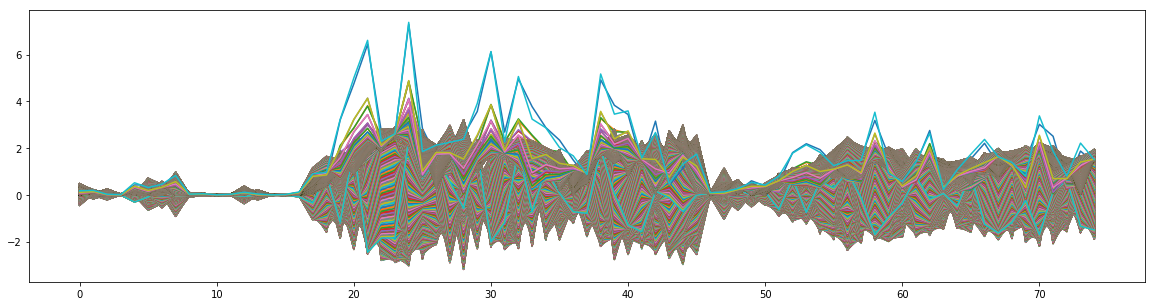

In [70]:
"""import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
analytic_signal = hilbert(data[0][0])
amplitude_envelope = np.abs(analytic_signal)

plt.plot(data[0][0], label='signal')
plt.plot(amplitude_envelope, label='envelope')
plt.show()"""